# GOES distribution of longitudes and latitudes

In [1]:
from bolideclusters import *

/home/kchen/miniconda3/envs/bolides/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


downloading: 22.7MiB [00:00, 63.7MiB/s]


6467
6467


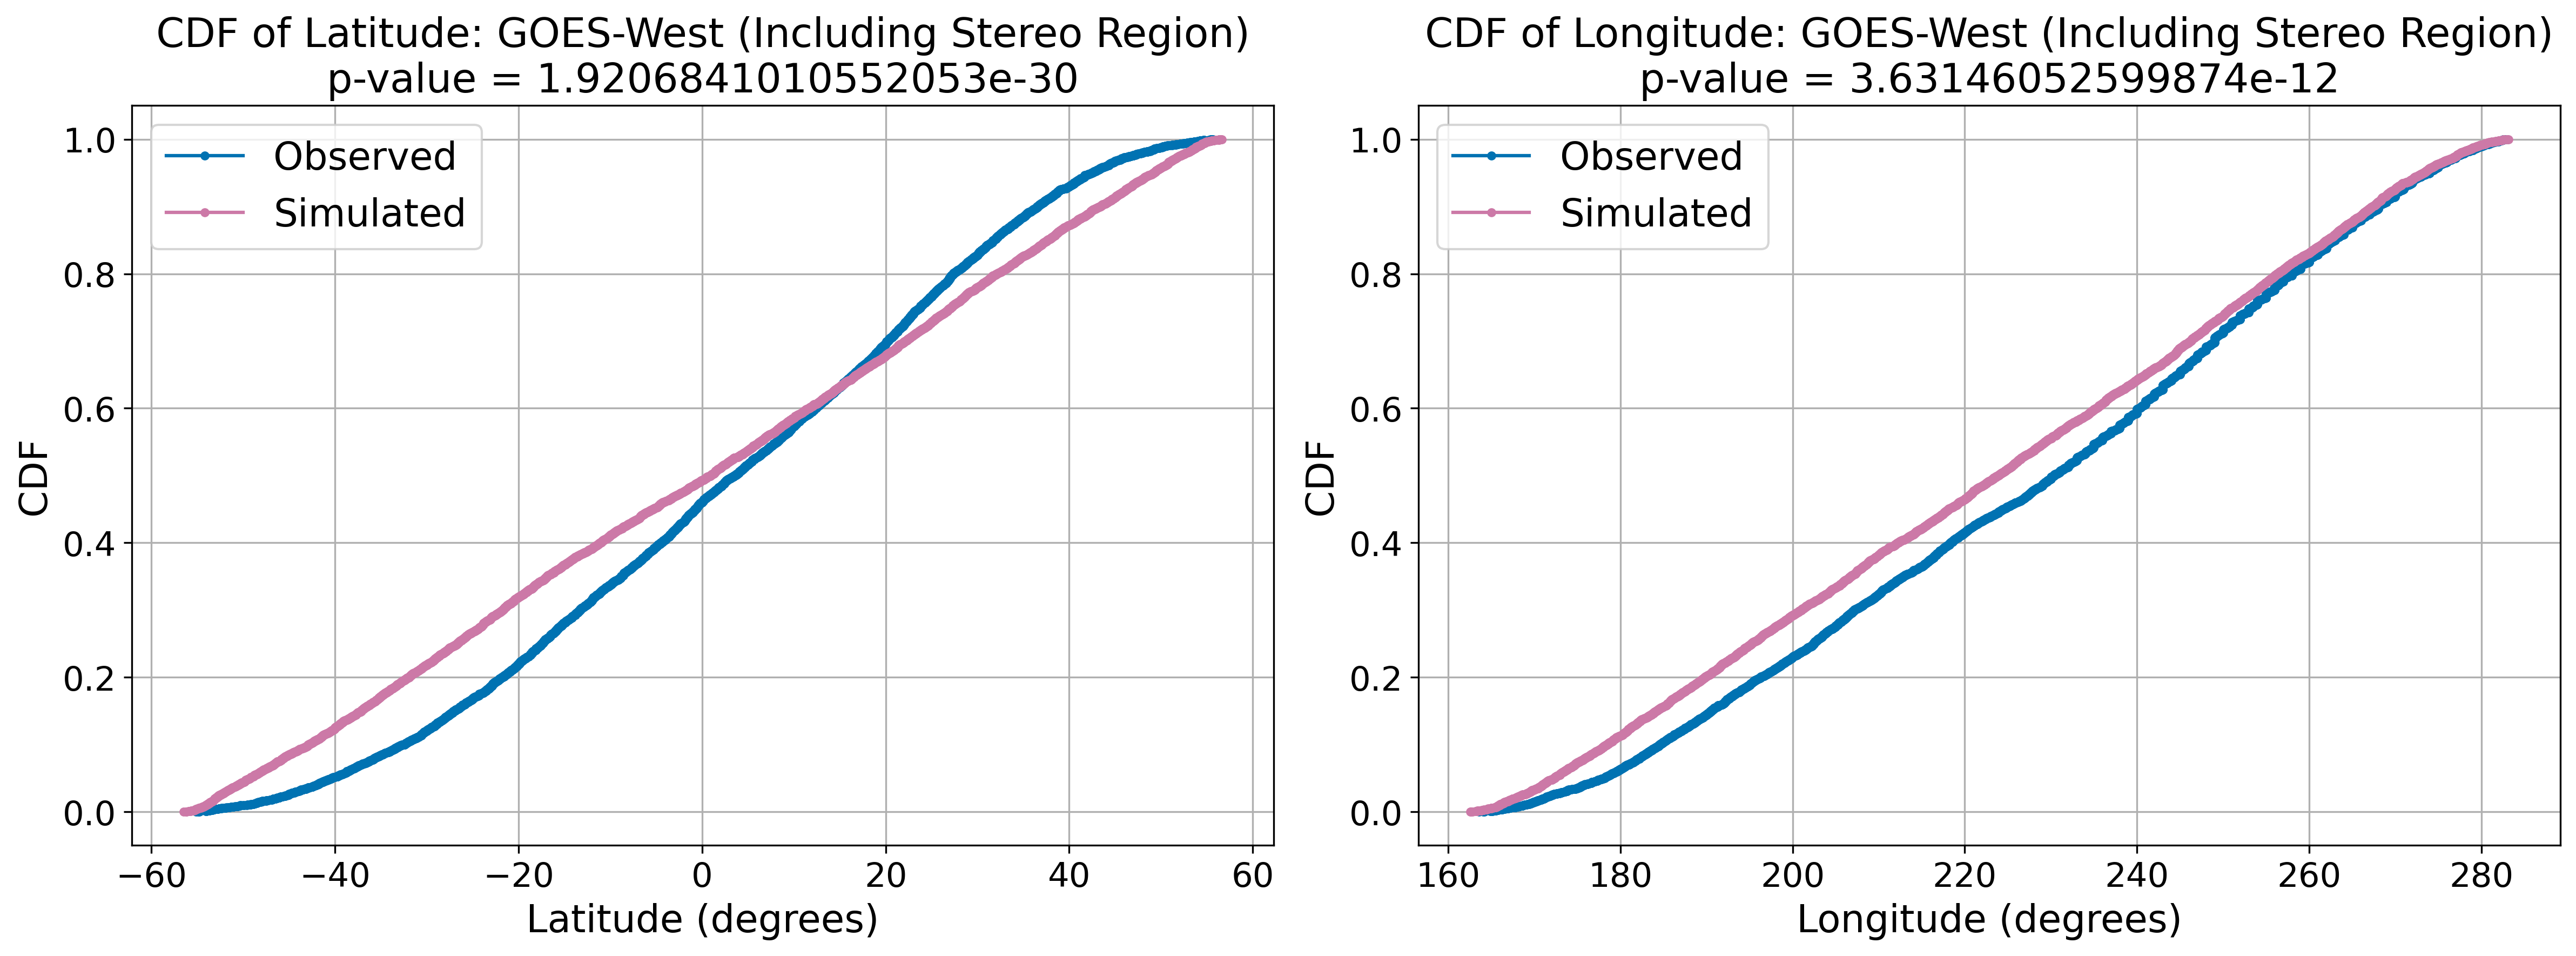

In [2]:
plot_cdf('goes-w', 'GOES-West (Including Stereo Region)', stereo=True)

downloading: 22.7MiB [00:00, 59.1MiB/s]


3162
3162


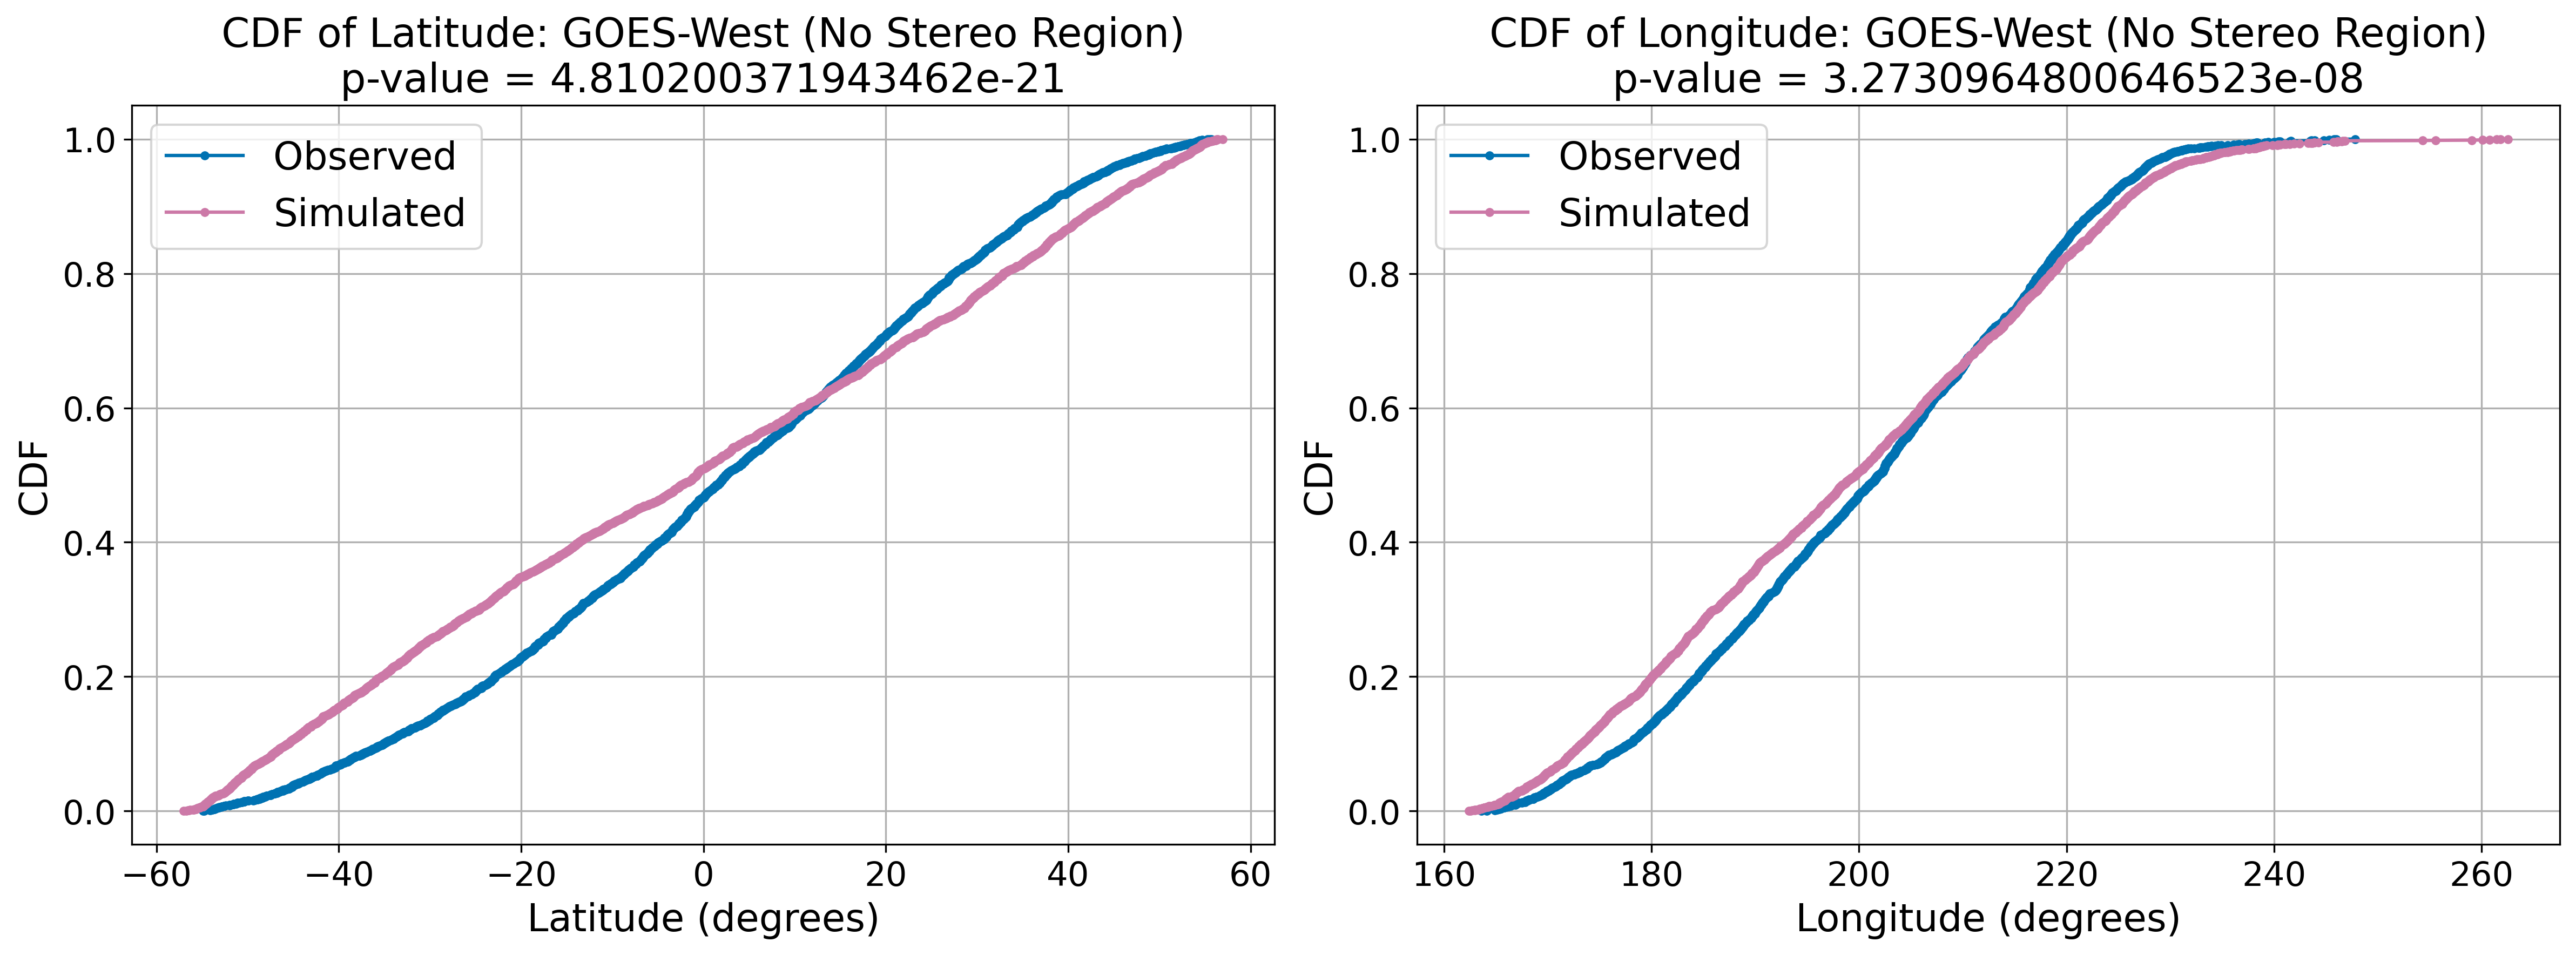

In [3]:
plot_cdf('goes-w', 'GOES-West (No Stereo Region)', stereo=False)

downloading: 22.7MiB [00:00, 60.8MiB/s]


2640
2640


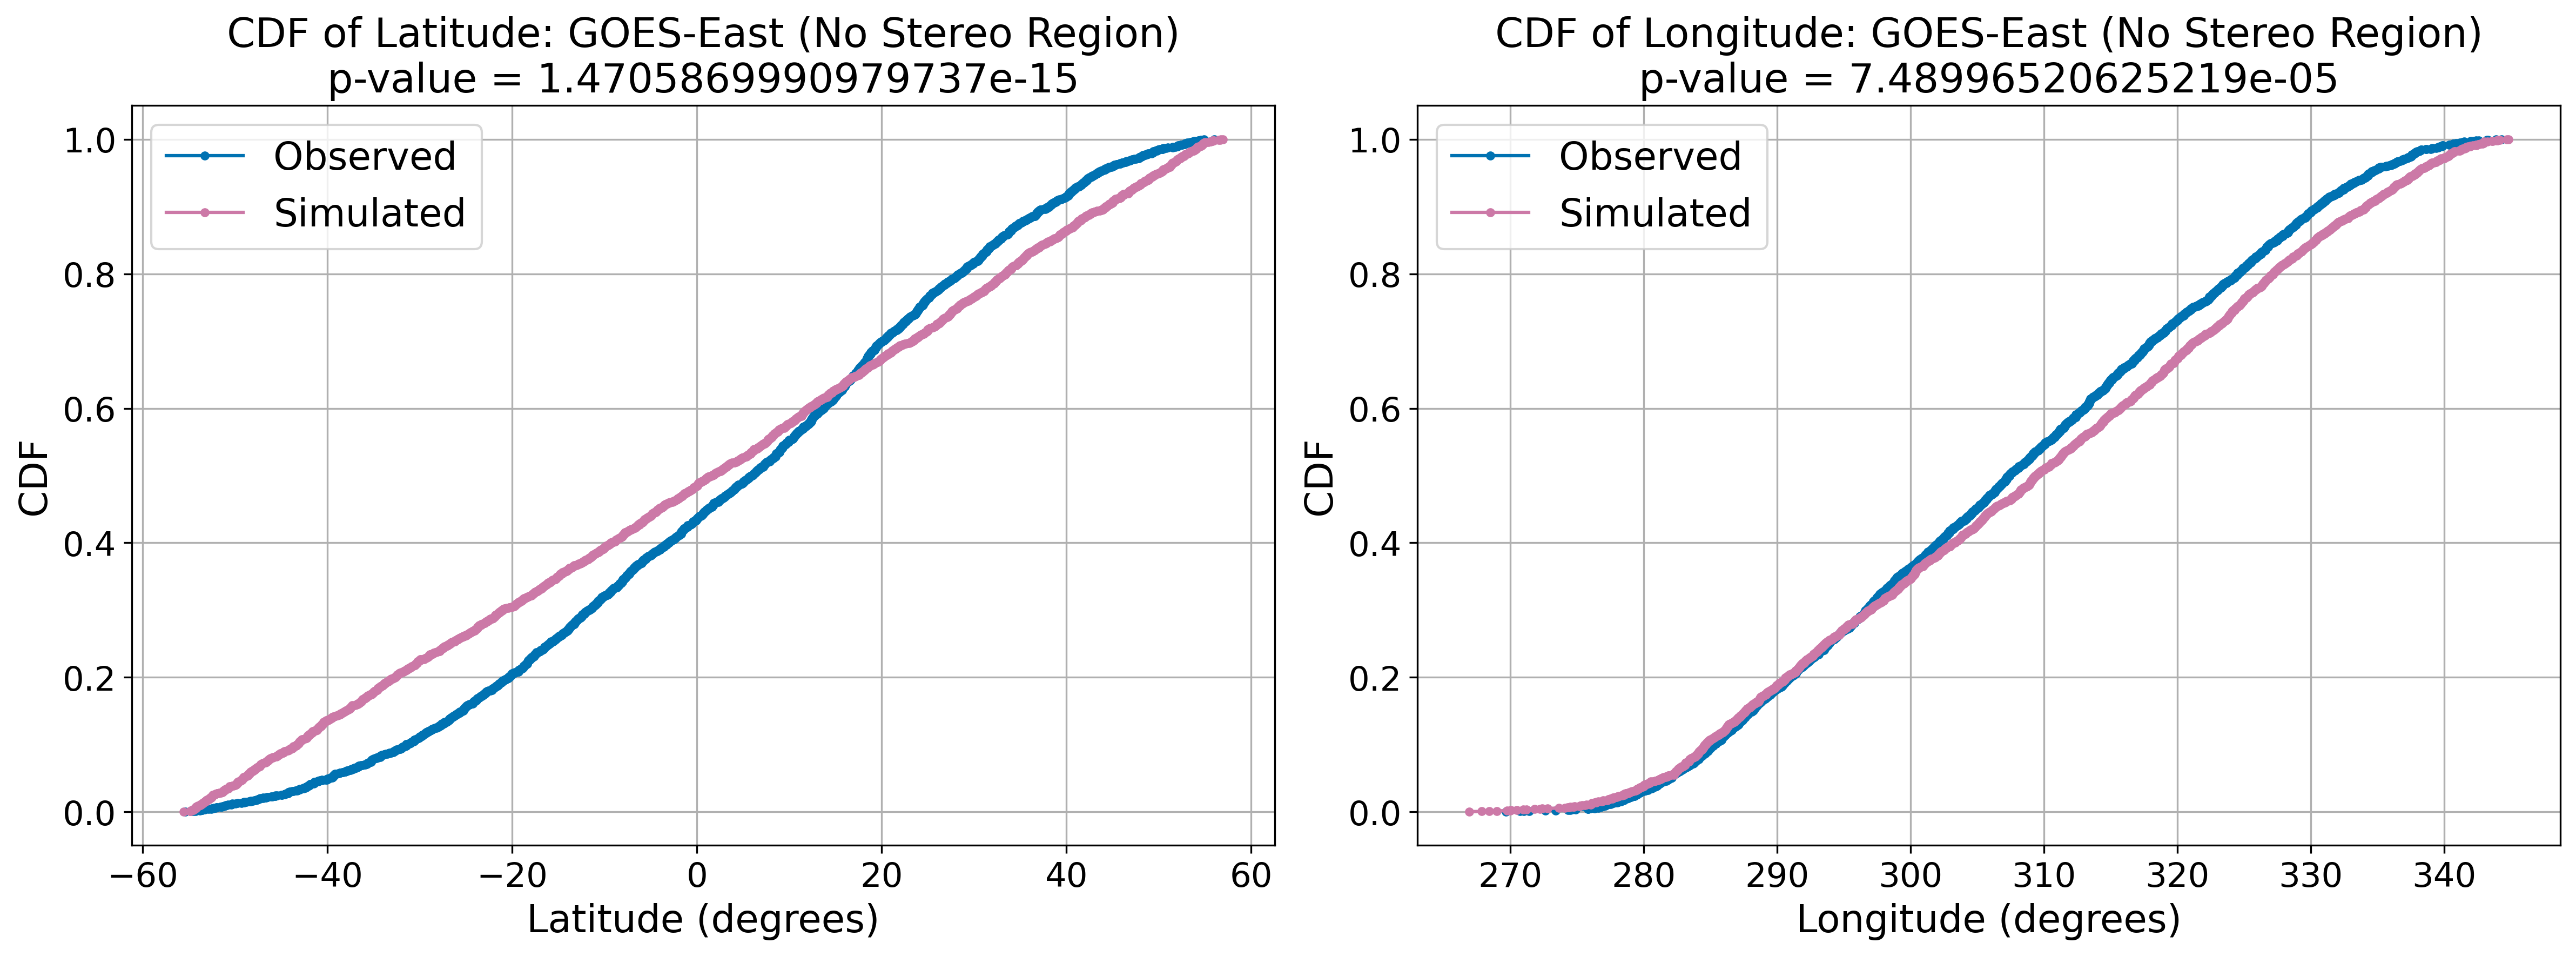

In [5]:
plot_cdf('goes-e', 'GOES-East (No Stereo Region)', stereo=False)

downloading: 22.7MiB [00:00, 61.6MiB/s]


5945
5945


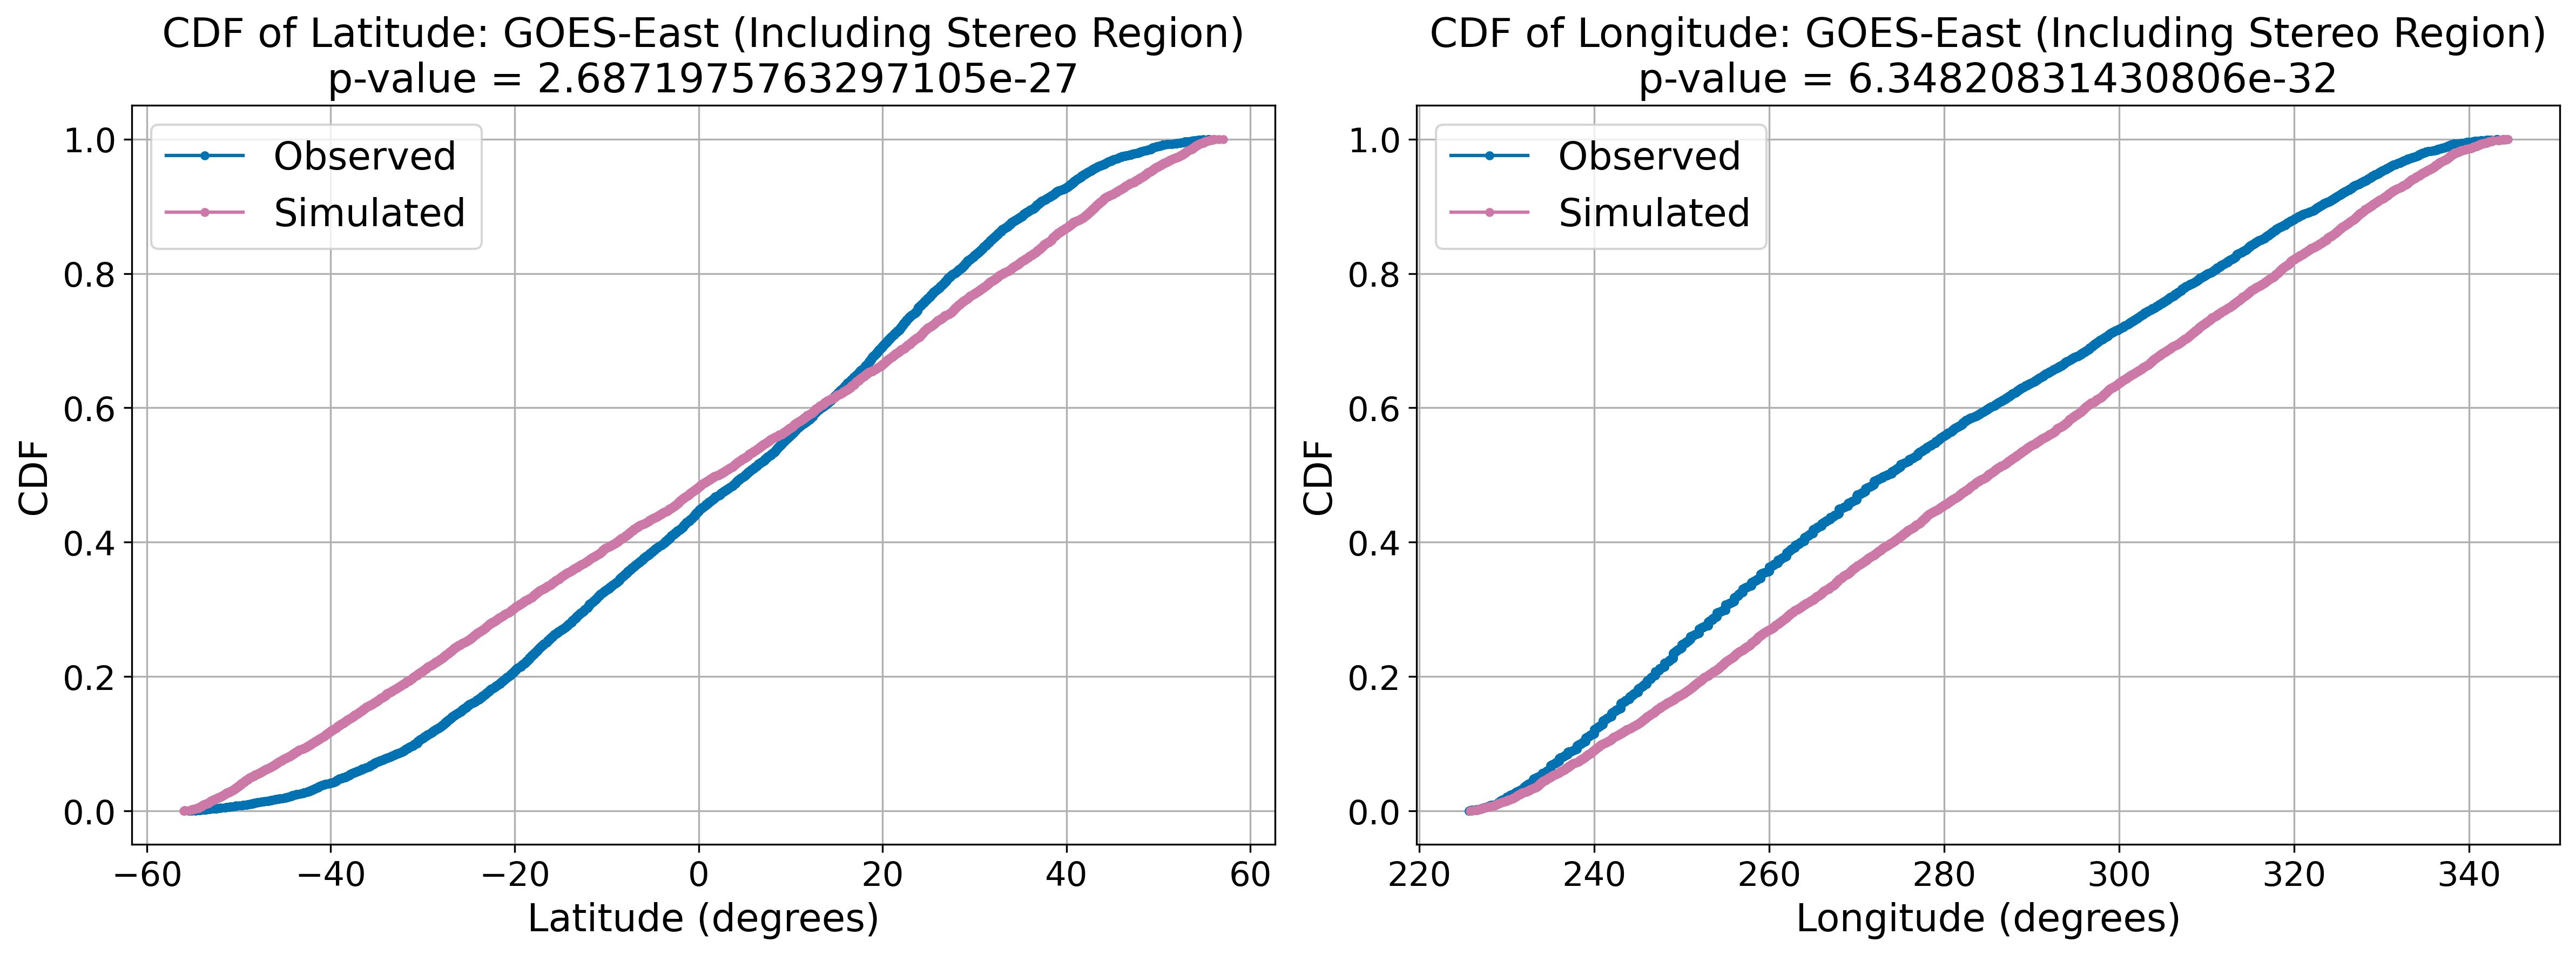

In [6]:
plot_cdf('goes-e', 'GOES-East (Including Stereo Region)', stereo=True)

downloading: 22.7MiB [00:00, 57.6MiB/s]


5802
5802


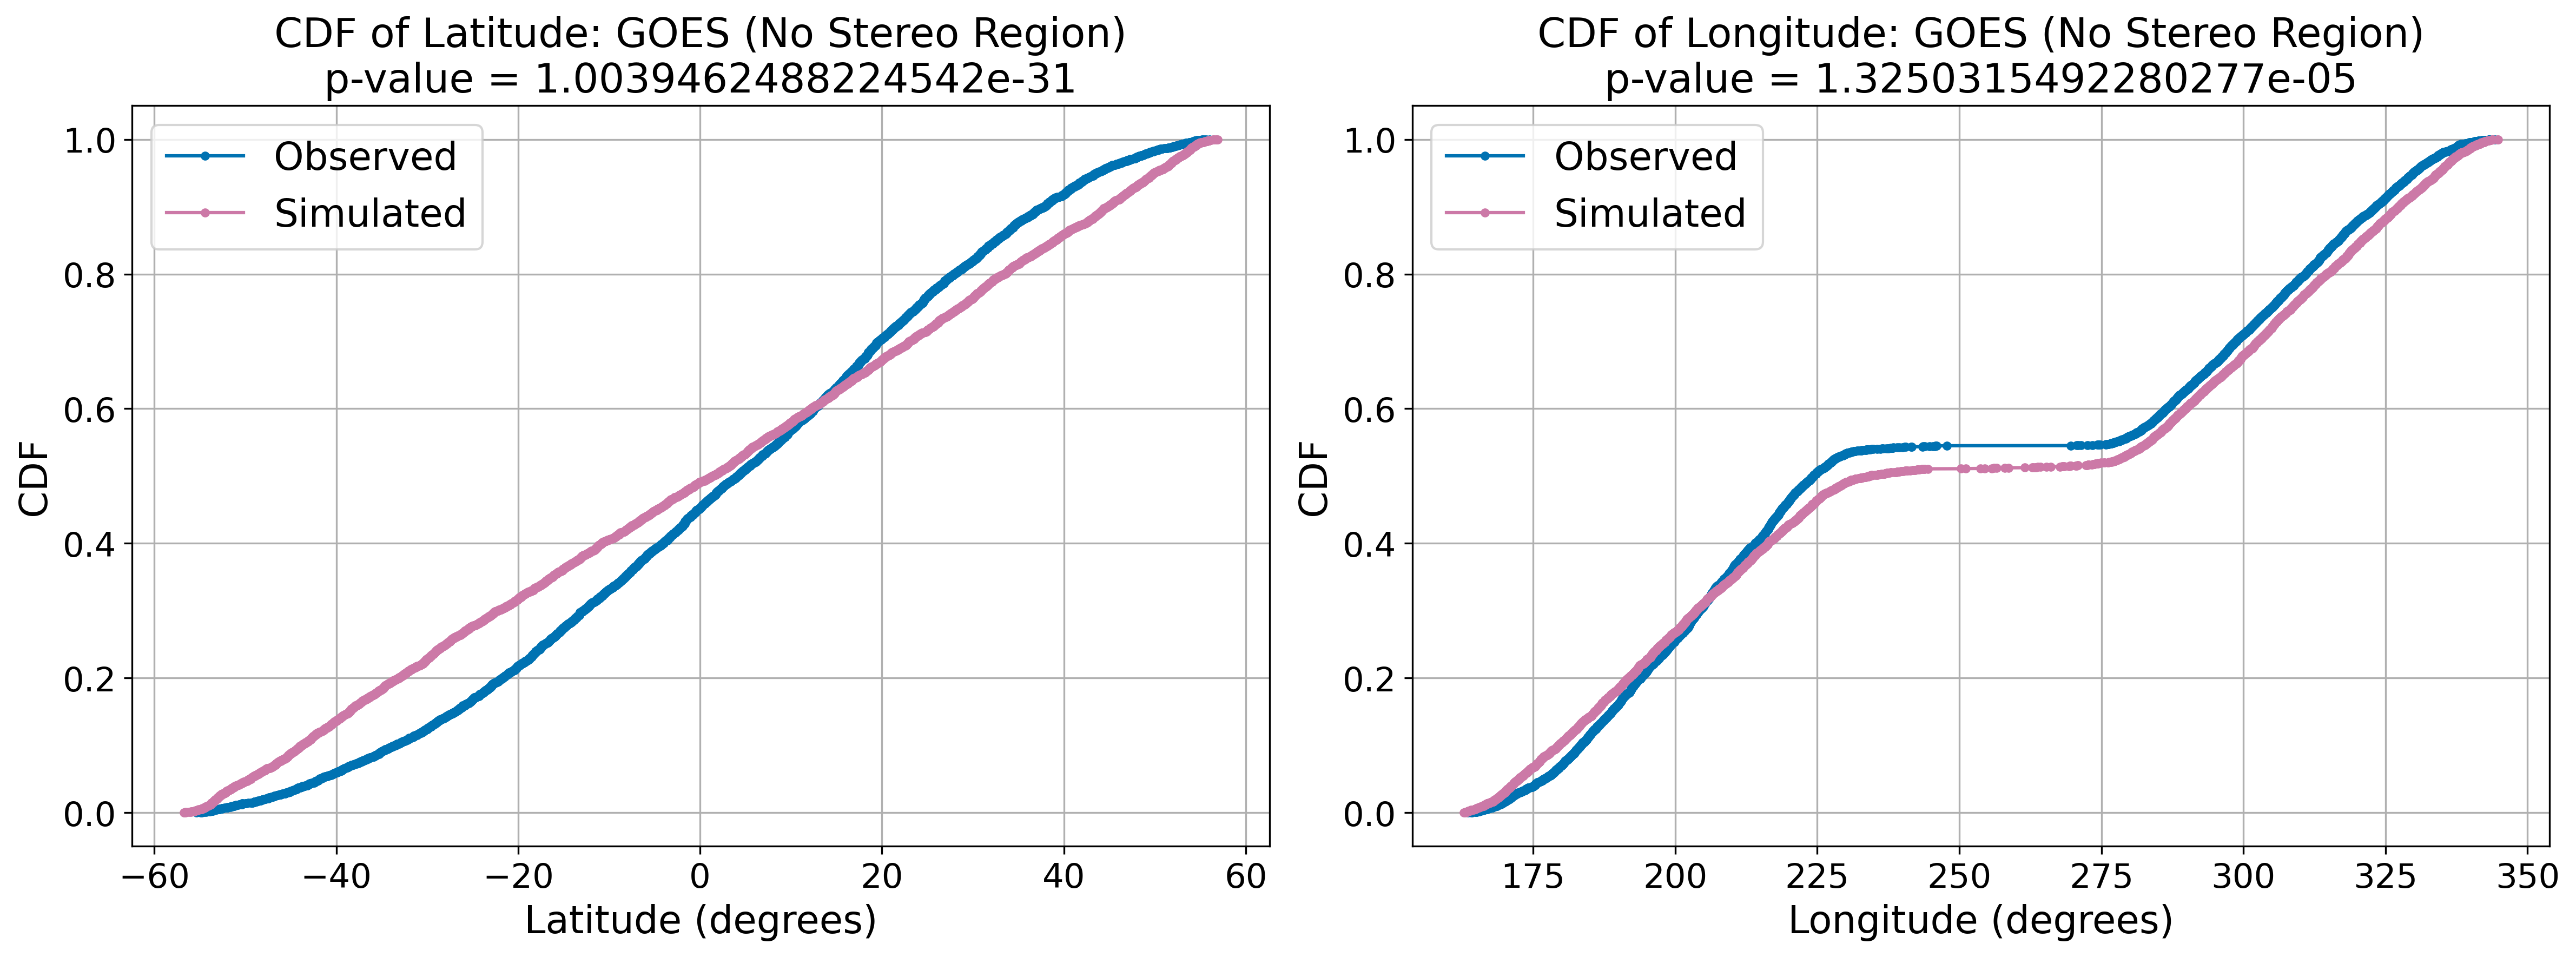

In [7]:
plot_cdf('goes', 'GOES (No Stereo Region)', stereo=False)

downloading: 22.7MiB [00:00, 58.8MiB/s]


9107
9107


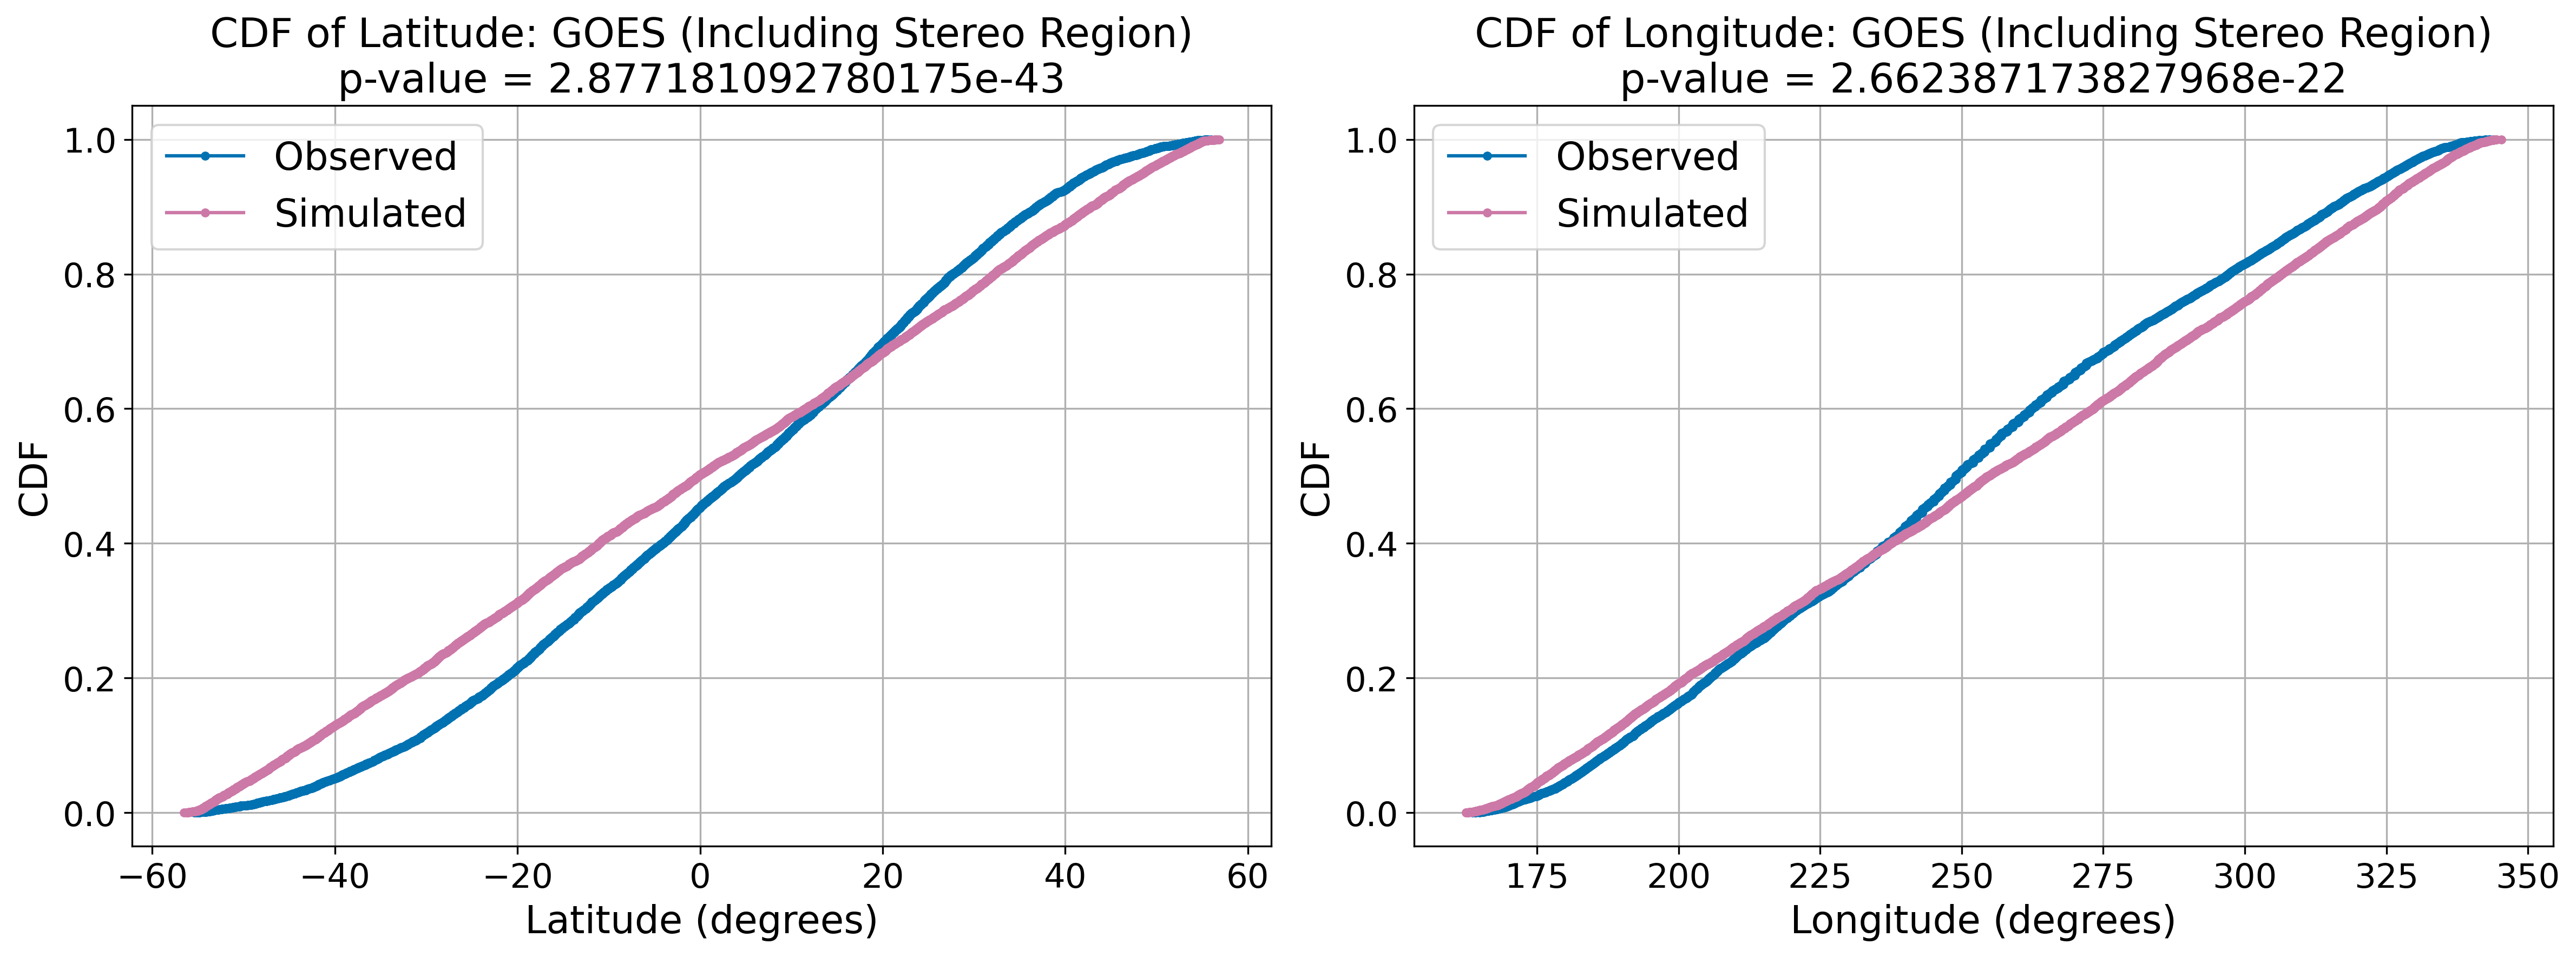

In [8]:
plot_cdf('goes', 'GOES (Including Stereo Region)', stereo=True)

downloading: 22.7MiB [00:00, 58.3MiB/s]


3305
3305


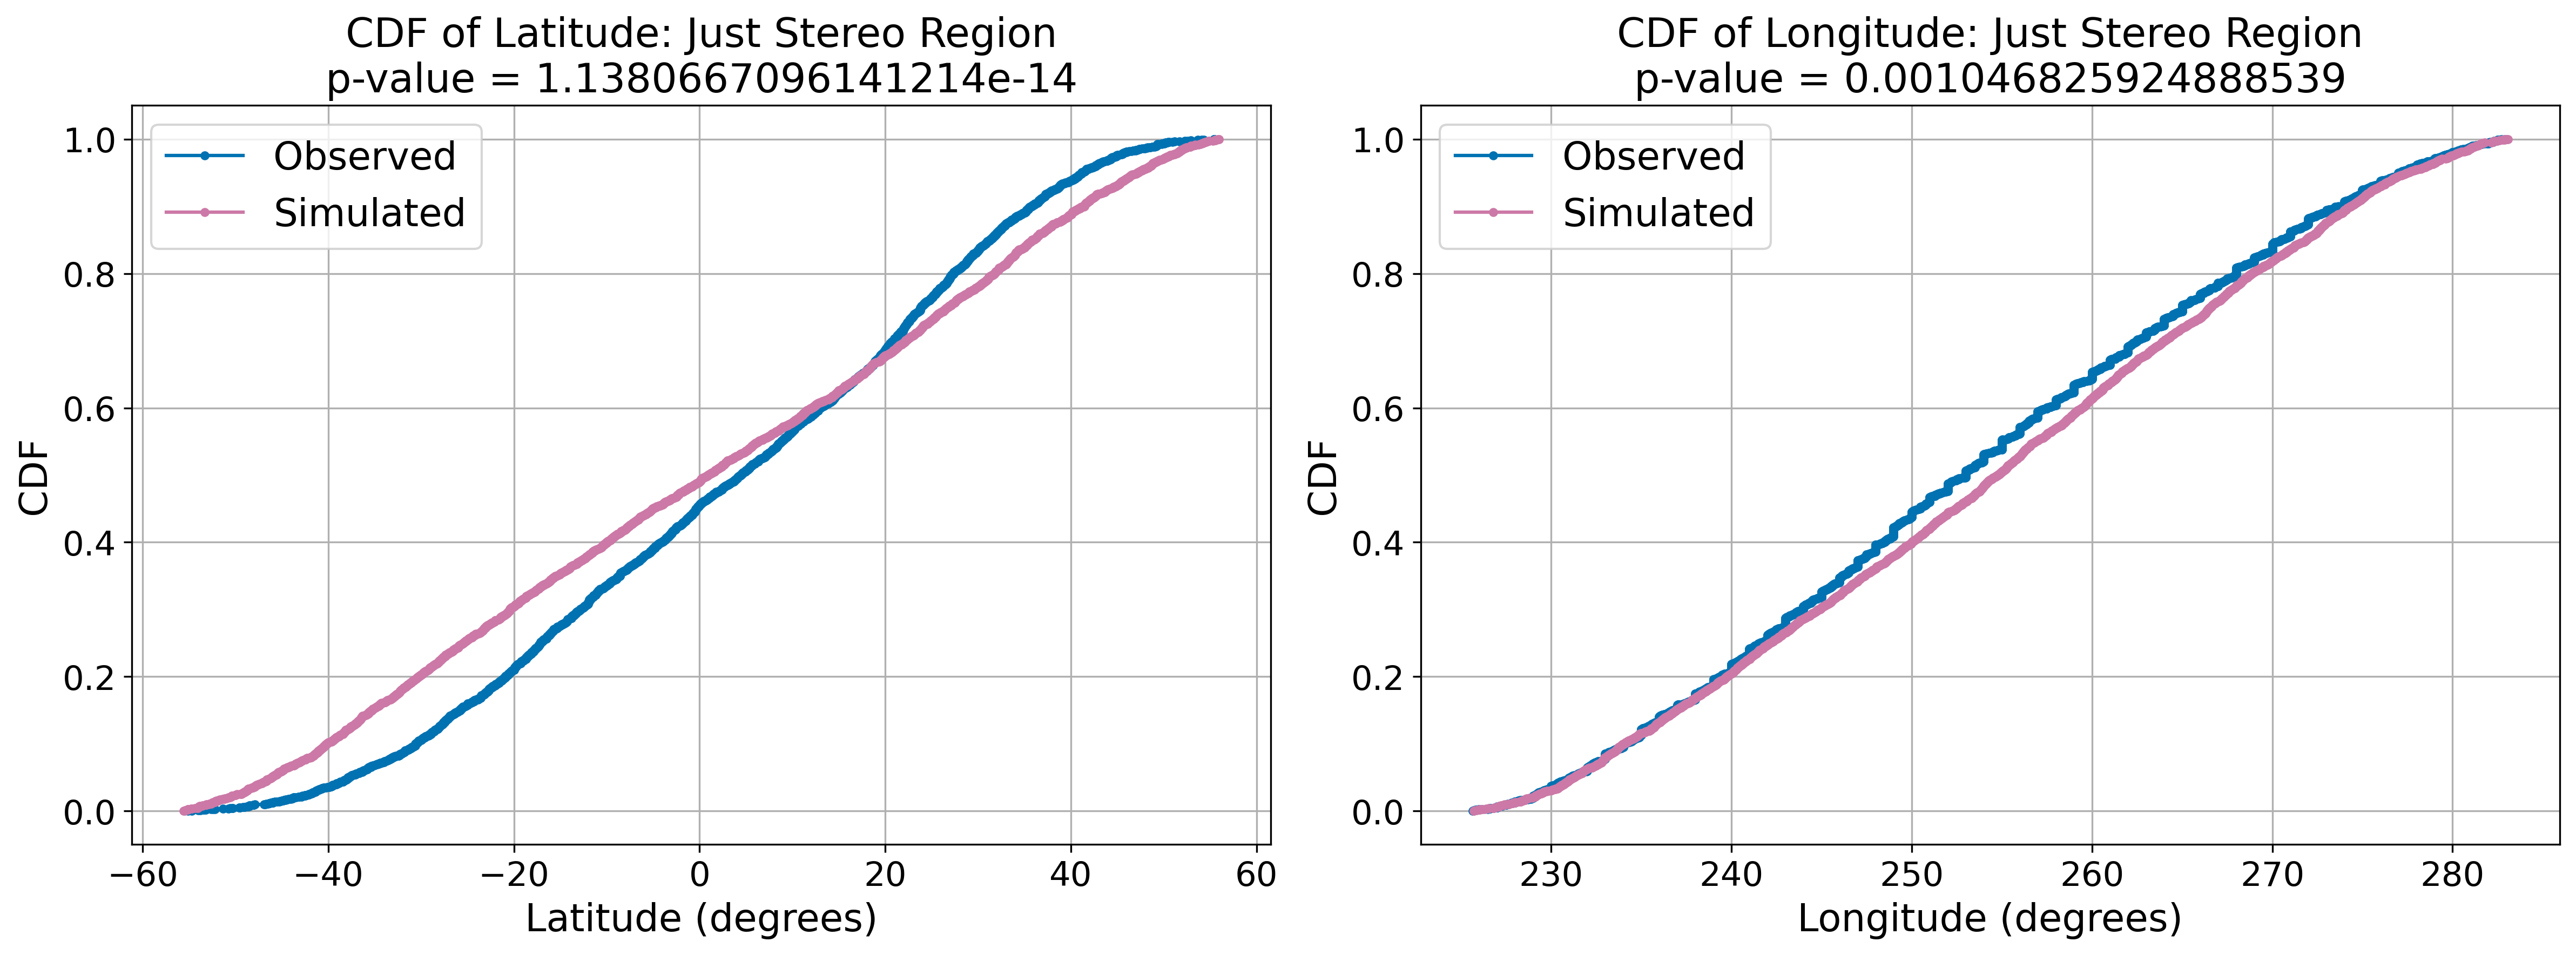

In [9]:
plot_cdf('goes', 'Just Stereo Region', stereo=True, just_stereo=True)

In [ ]:
import scipy.stats as stats

from bolides import fov_utils as fu
poly_west = fu.get_boundary('goes-w', collection=True, intersection=False, crs=None)
lon_samples, lat_samples = montecarlo(poly=poly_west, stereo=True, n_samples=100000, just_stereo=False)
lon_samples1, lat_samples1 = montecarlo(poly=poly_west, stereo=True, n_samples=100000, just_stereo=False)


def sim_cdf(x):
    # Returns the fraction of simulated_lats <= x
    return np.searchsorted(lat_samples, x, side='right') / len(lat_samples)

ks_statistic, p_value = stats.ks_1samp(lat_samples1, sim_cdf)

In [13]:
p_value

np.float64(0.0)

In [1]:
from bolides import ShowerDataFrame
sdf = ShowerDataFrame()

/home/kchen/miniconda3/envs/bolides/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
sdf.head()

,LP,IAUNo,AdNo,Code,shower name,activity,s,LaSun,ra,dec,dRa,dDe,Vg,a,q,e,peri,node,i,N,Group,CG,Parent body,Remarks,Ote,References,LT,SD,source
0,1,1,0,CAP,alpha Capricornids,annual,1,128.9,306.6,-8.2,0.54,0.26,22.2,2.618,0.602,NaN,266.67,128.9,7.68,00036,0,0,169P/NEAT (= 2002 EX12),,,1) <A href='http://adsabs.harvard.edu/abs/2006...,LT,SD,iau
1,2,1,1,CAP,alpha Capricornids,annual,1,122.3,306.7,-9.3,0.91,0.25,23.4,NaN,0.550,0.768,273.30,122.3,7.70,00269,0,0,169P/NEAT (= 2002 EX12),,R,2) <A href='http://adsabs.harvard.edu/abs/2002...,LT,SD,iau
2,3,1,2,CAP,alpha Capricornids,annual,1,123.8,303.4,-10.6,0.75,0.28,22.2,2.540,0.594,NaN,267.60,123.8,7.20,,0,0,169P/NEAT (= 2002 EX12),,P,3) <A href='http://adsabs.harvard.edu/abs/2001...,LT,SD,iau
3,4,1,3,CAP,alpha Capricornids,annual,1,129.0,308.4,-9.6,0.9,0.3,22.8,2.530,0.59,0.770,269.00,127.7,7.00,00021,0,0,169P/NEAT (= 2002 EX12),,,4) <A href='http://adsabs.harvard.edu/abs/1973...,LT,SD,iau
4,5,1,4,CAP,alpha Capricornids,annual,1,127.9,307.1,-8.9,,,22.6,NaN,0.586,0.770,268.40,127.9,7.40,00022,0,0,,,P,5) <A href='http://adsabs.harvard.edu/abs/2003...,LT,SD,iau


In [3]:
years = list(range(2000, 2025))
dates = sdf.get_dates('LEO', years).datetime

In [4]:
dates

0     2000-11-17 06:11:02.860858+00:00
1     2000-11-17 01:25:24.715394+00:00
2     2000-11-17 18:05:01.839642+00:00
3     2000-11-17 10:56:39.544492+00:00
4     2000-11-17 01:25:24.715394+00:00
                    ...               
120   2024-11-17 09:51:11.947449+00:00
121   2024-11-17 05:05:33.801985+00:00
122   2024-11-17 21:45:10.926233+00:00
123   2024-11-17 14:36:48.631083+00:00
124   2024-11-17 05:05:33.801985+00:00
Name: datetime, Length: 125, dtype: datetime64[ns, UTC]